<a href="https://colab.research.google.com/github/gitakartika/UAS-Data-Mining/blob/main/UAS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Akhir Data Mining - Kelompok Athena

Fraud Detection (https://www.kaggle.com/preritsaxena/fraud-detection)

Anggota:
1. Brenda Mutiara Samiadji (1706023063)
2. Gita Kartika Suriah (1706031645)
3. Mega Fransiska (1706982342)
4. Sheryl Nathania Salim (1706068250)

Kontribusi:
1. Brenda : Mencari data, EDA (penjelasan pada python), presentasi, diskusi insight
2. Gita   : EDA (coding), klasifikasi (coding), diskusi insight
3. Mega   : Klasifikasi (penjelasan pada python), presentasi, diskusi insight
4. Sheryl : Mencari data, EDA (penjelasan pada python), presentasi, diskusi insight

In [ ]:
!unzip /content/datmin_uas.zip

unzip:  cannot find or open /content/datmin_uas.zip, /content/datmin_uas.zip.zip or /content/datmin_uas.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *Import package*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import numpy as np
from sklearn import preprocessing
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_auc_score, roc_curve, f1_score, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# ***Exploratory Data Analysis***


---



# I. *Import data*

In [ ]:
#import data mega, data diupload ke /content/ colab
#df=pd.read_csv('/content/Fraud_Data_datmin.csv')
#df.head()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Mining/Fraud_Data.csv') #load dataset dan disimpan dalam variabel "df"
df.head() #kita ingin melihat 5 data teratas 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
df.shape #untuk melihat ukuran dataset

(151112, 11)

In [ ]:
df['is_fraud'].value_counts() #jumlah kasus fraud dan not fraud

0    136961
1     14151
Name: is_fraud, dtype: int64

# II. *Pre-processing*

Untuk memperoleh insight atau informasi, maka perlu diperoleh data yang baik terlebih dahulu melalui *pre-processing*

## 1. *Duplicate Removal*

In [ ]:
df.duplicated().sum() #untuk mengecek jumlah duplikasi dalam data yang digunakan

0

kesimpulan: tidak ada data yang terduplikasi

In [ ]:
df.info() #untuk memperoleh informasi mengenai data, seperti jumlah variabel dan tipe variabel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  is_fraud        151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


## 2. *Missing Value Detection*

In [ ]:
df.isna().sum() #untuk memperoleh jumlah missing value setiap variabel

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
is_fraud          0
dtype: int64

Kesimpulan: tidak ada Missing value

In [ ]:
df.nunique() #untuk memperoleh jumlah nilai unik dari setiap variabel

user_id           151112
signup_time       151112
purchase_time     150679
purchase_value       122
device_id         137956
source                 3
browser                5
sex                    2
age                   58
ip_address        143511
is_fraud               2
dtype: int64

## 3. *Data Transformation*

Variabel 'signup_time' dan 'purchase_time' seharusnya memiliki tipe data waktu (sebelumnya object), sehingga akan diubah menjadi tipe 'datetime64'. Selanjutnya, untuk memperoleh informasi tambahan, maka akan dicari selisih waktu transaksi dan pembuatan akun yang disimpan dalam variabel 'time_diff'

In [ ]:
for col in ['ip_address','user_id']:
    df[col] = df[col].astype('str')

for col in ['signup_time','purchase_time']:
    df[col] = df[col].astype('datetime64') #untuk mengubah tipe variabel 'signup_time' dan 'purchase_time' agar menjadi tipe waktu

#akan dihitung selisih antara waktu membuat akun pertama kali dengan waktu terjadinya belanja. Lalu akan dihapus variabel 'signup_time' dan 'purchase_time'
df['time_diff']=df['purchase_time']-df['signup_time']
df['time_diff']=df['time_diff'].astype('timedelta64[m]') #mengubah tipe data pada variabel 'time_diff'

for col in ['sex', 'is_fraud']:
    df[col] = df[col].astype('category')

df.head() #untuk menamplikan 5 data teratas dari data yang telah siap untuk digunakan

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.8,0,75111.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.9,0,299.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.0,1,0.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542444.0,0,8201.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.5,0,72691.0


In [ ]:
df.info() #untuk memperoleh gambar dari data yang telah siap untuk digunakan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  object        
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  object        
 10  is_fraud        151112 non-null  category      
 11  time_diff       151112 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 11.8+ MB


## 4. *Noise Detection*

In [ ]:
#melihat statistika deskriptif dari data untuk melihat noise (data-data yang tidak masuk akal)
df.describe()

,purchase_value,age,time_diff
count,151112.000000,151112.000000,151112.000000
mean,36.935372,33.140704,82200.019390
std,18.322762,8.617733,52104.347093
min,9.000000,18.000000,0.000000
25%,22.000000,27.000000,36445.750000
50%,35.000000,33.000000,82105.000000
75%,49.000000,39.000000,127408.000000
max,154.000000,76.000000,172799.000000


Berdasarkan statistika deskriptif yang diperoleh, tidak didapatkan hal yang aneh seperti data pada 'time_diff' bernilai negatif, dan lain-lain, sehingga dapat disimpulkan tidak terdapat noise pada data.

## 5. *Data Visualization*

### A. Analisis akun-akun yang diakses melalui *device* dan IP Address yang sama

Sebelum melakukan visualisasi data, ingin dianalisis apakah terdapat akun-akun yang sebenarnya hanya dibuat oleh satu orang yang sama dengan cara mengecek akun yang diakses dari IP Address yang sama. Analisis dilakukan secara terpisah antara kasus penipuan dan yang bukan untuk memperoleh informasi yang lebih baik

In [ ]:
df_dif=df[df['is_fraud']==1].groupby(['device_id']).agg({'user_id':'count'}).sort_values('user_id',ascending=False).reset_index()
df_dif.columns = ['Device_ID', 'Jumlah User ID Berbeda']
df_dif.head(10)

,Device_ID,Jumlah User ID Berbeda
0,CQTUVBYIWWWBC,19
1,EQYVNEGOFLAWK,19
2,NGQCKIADMZORL,19
3,ZUSVMDEZRBDTX,19
4,KIPFSCNUGOLDP,19
5,ITUMJCKWEYNDD,19
6,IGKYVZDBEGALB,18
7,EGLGSEGYPMMAM,18
8,BWSMVSLCJXMCM,18
9,CDFXVYHOIHPYP,18


In [ ]:
df_dif=df[df['is_fraud']==0].groupby(['device_id']).agg({'user_id':'count'}).sort_values('user_id',ascending=False).reset_index()
df_dif.columns = ['Device_ID', 'Jumlah User ID Berbeda']
df_dif.head(10)

,Device_ID,Jumlah User ID Berbeda
0,VRLUJWUSZHOXO,3
1,HPJABLMUQASBK,3
2,MBXRPIGJLGMHU,3
3,VLJAYCNNEIWOH,3
4,ZTUETGYUPWOYV,3
5,SANQZCPGRCERN,3
6,LLVQVKNEEXFMS,3
7,CMYNZQLGTENFH,3
8,ODLFOGITAOMIH,3
9,HVGLMDIRYIEVX,3


Diperoleh informasi bahwa kasus penipuan seringkali berasal dari Device_ID yang sama meskipun menggunakan akun yang berbeda. Selain itu,untuk tabel sebelah kanan yaitu kasus bukan penipuan, diperoleh informasi bahwa pelanggan maksimal hanya memiliki 3 akun berbeda dalam 1 device id yang sama. Oleh karena itu e-commerce X perlu waspada pada device_id yang memiliki lebih dari 3 akun yang berbeda. Secara khusus, e-commerce X juga dapat melakukan block pada device id yang bersangkutan. 

In [ ]:
df_ipf=df[df['is_fraud']==1].groupby(['ip_address']).agg({'user_id':'count'}).sort_values('user_id',ascending=False).reset_index()
df_ipf.columns = ['IP_Address', 'Jumlah User ID Berbeda']
df_ipf.head(10)

,IP_Address,Jumlah User ID Berbeda
0,348493400.7,19
1,3874757617.0,19
2,576060872.5,19
3,2050963888.0,19
4,1502818420.0,19
5,1797069086.0,18
6,2586669382.0,18
7,2937899120.0,18
8,1800549620.0,18
9,3503223510.0,18


In [ ]:
df_ipf=df[df['is_fraud']==0].groupby(['ip_address']).agg({'user_id':'count'}).sort_values('user_id',ascending=False).reset_index()
df_ipf.columns = ['IP_Address', 'Jumlah User ID Berbeda']
df_ipf.head(10)

,IP_Address,Jumlah User ID Berbeda
0,4269198703.0,2
1,1000035205.0,1
2,3584417851.0,1
3,3584310715.0,1
4,3584325910.0,1
5,3584367327.0,1
6,3584368394.0,1
7,3584396154.0,1
8,3584453038.0,1
9,3584253509.0,1


Secara garis besar IP Address memberikan insight yang kurang lebih sama dengan Device ID, dimana maksimum jumlah user id yang memiliki ip address yang sama kurang dari 3. Pada saat yang sama untuk kasus penipuan, 1 IP address dapat memiliki lebih dari 5 akun berbeda.

Setelah data siap untuk digunakan, maka selanjutnya akan dilakukan data visualization untuk memperoleh informasi-informasi dari data

### B. Visualisasi Persebaran/ Distribusi Data Secara Umum

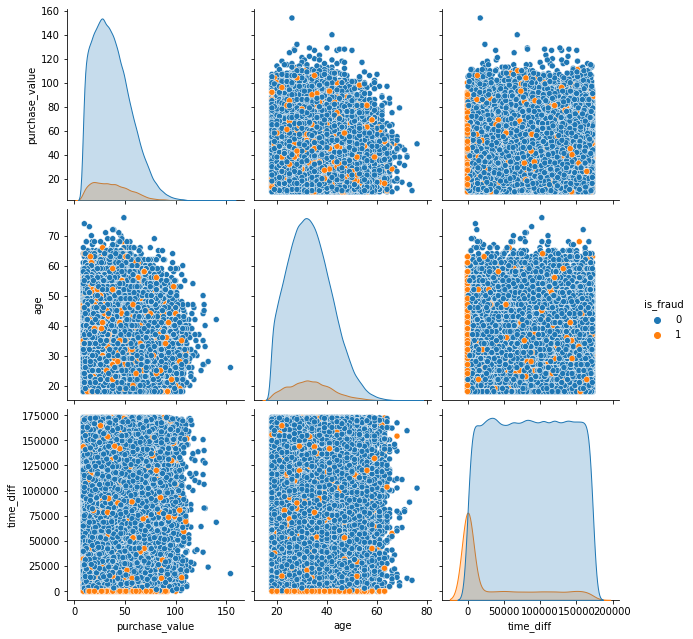

In [ ]:
#Berikut disajikan visualisasi pairplot variabel nominal pembelian, usia pembeli, selisih waktu pembelian dan pembuatan akun, serta keterangan apakah 
#transaksi yang dilakukan merupakan tindakan penipuan atau bukan. Diagonal utama menunjukkan kepadatan satu variabel yang dibedakan oleh warna oranye (penupuan) dan biru (bukan penipuan).
sns.pairplot(df[['purchase_value','age','time_diff','is_fraud']],hue='is_fraud',height=3)


Secara garis besar, kita dapat melihat distribusi variabel numerik dimana bentuk distribusi yang paling berbeda antasa kasus penipuan dan bukan adalah distribusi 'time_diff'. Sehingga akan di analisis lebih lanjut mengenai distribusi ini.

[Text(0.5, 1.0, 'Distribusi Usia Konsumen')]

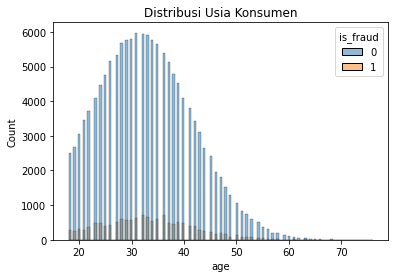

In [ ]:
#untuk melihat bentuk distribusi data berdasarkan usia pelanggan
sns.histplot(data=df, x="age", hue='is_fraud').set(title='Distribusi Usia Konsumen')

[Text(0.5, 1.0, 'Distribusi Waktu Jeda')]

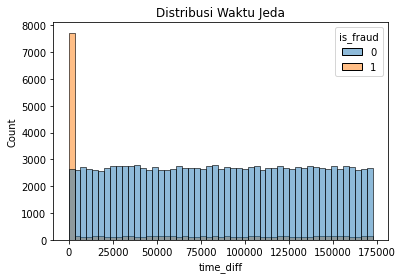

In [ ]:
#untuk melihat bentuk distribusi data berdasarkan jeda waktu antara pembuatan akun dan waktu transaksi
sns.histplot(data=df, x="time_diff", hue='is_fraud').set(title='Distribusi Waktu Jeda')

Kurva Orens yang merepresentasikan kasus penipuan menunjukkan perilaku anomaly dan berbeda dengan kurva biru dimana kasus penipuan cenderung lebih banyak terjadi pada jeda waktu yang pendek. Hal ini memberikan kita infromasi bahwa kasus penipuan sering dilakukan oleh oknum yang baru membuat akun. Sehingga rekomendasi kami untuk pihak e-commerce adalah untuk meningkatkan keamanan pada pengguna pertama yang baru membuat akun. Dalam hal ini peningkatan keamanan dapat dilakukan dengan menahan transaksi yang sudah terjadi dalam beberapa jam pertama. Artinya walaupun transaksi sudah terjadi  namun sebaiknya pemesanan belum diproses langsung ke penjual. Hal ini dilakukan untuk memberi kesempatan kepada pihak yang dirugikan untuk melaporkan penipuan ini.

[Text(0.5, 1.0, 'Distribusi Nominal Transaksi')]

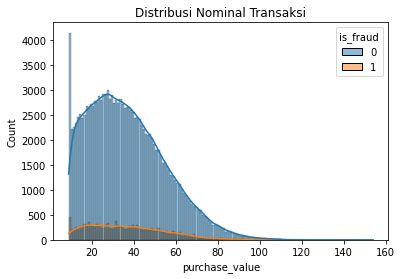

In [ ]:
#untuk melihat bentuk distribusi data berdasarkan nominal transaksi
sns.histplot(data=df, x="purchase_value",kde=True, hue='is_fraud').set(title='Distribusi Nominal Transaksi')

[Text(0.5, 1.0, 'Distribusi Nominal Transaksi Kasus Penipuan')]

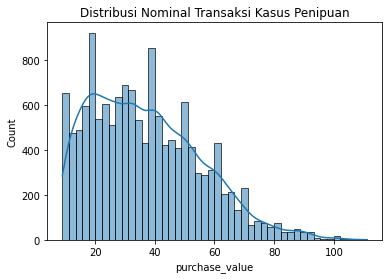

In [ ]:
#untuk melihat bentuk distribusi data berdasarkan nominal transaksi untuk kasus penipuan
sns.histplot(data=df[df['is_fraud']==1], x="purchase_value",kde=True).set(title='Distribusi Nominal Transaksi Kasus Penipuan')

[Text(0.5, 1.0, 'Distribusi Nominal Transaksi Kasus Bukan Penipuan')]

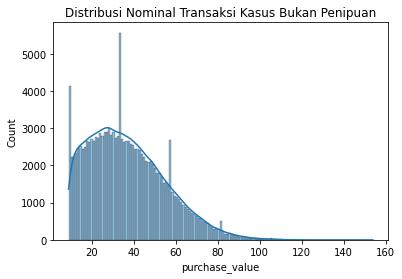

In [ ]:
#untuk melihat bentuk distribusi data berdasarkan nominal transaksi untuk kasus bukan penipuan
sns.histplot(data=df[df['is_fraud']==0], x="purchase_value",kde=True).set(title='Distribusi Nominal Transaksi Kasus Bukan Penipuan')

In [ ]:
#untuk melihat rata-rata nominal transaksi, umur pelanggan, dan jeda waktu untuk kasus bukan penipuan dan penipuan
df.groupby('is_fraud').mean()

,purchase_value,age,time_diff
is_fraud,,,
0,36.929418,33.122356,86519.151109
1,36.993004,33.318281,40397.136245


### C. Jumlah kasus *fraud* dan tidak *fraud* berdasarkan waktu pembuatan akun dan waktu terjadinya transaksi

In [ ]:
#Pengkategorian data berdasarkan waktu terjadinya transaksi (early morning, morning, noon, evening, night, dan lat night).
#Early morning (pukul 1-4), morning (pukul 5-8), noon (pukul 9-12), evening (pukul 13-16), night (pukul 17-20), dan late night (pukul 21-24) 
df['signup_time_date']=df['signup_time'].apply(lambda x: x.date())
df['signup_time_dayofweek'] = df['signup_time'].dt.strftime('%a') #dari data waktu yang ada, hanya ingin di ambil harinya saja
df['signup_time_period'] = (df['signup_time'].dt.hour % 24 + 4) // 4 
df['signup_time_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True) #1 hari dibagi menjadi 6 periode waktu

df['purchase_time_date']=df['purchase_time'].apply(lambda x: x.date())
df['purchase_time_dayofweek'] = df['purchase_time'].dt.strftime('%a') #dari data waktu yang ada, hanya ingin di ambil harinya saja
df['purchase_time_period'] = (df['purchase_time'].dt.hour % 24 + 4) // 4 
df['purchase_time_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True) #1 hari dibagi menjadi 6 periode waktu

df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,is_fraud,time_diff,signup_time_date,signup_time_dayofweek,signup_time_period,purchase_time_date,purchase_time_dayofweek,purchase_time_period
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,75111.0,2015-02-24,Tue,Night,2015-04-18,Sat,Late Night
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,299.0,2015-06-07,Sun,Night,2015-06-08,Mon,Late Night
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,0.0,2015-01-01,Thu,Evening,2015-01-01,Thu,Evening
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,8201.0,2015-04-28,Tue,Night,2015-05-04,Mon,Noon
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,72691.0,2015-07-21,Tue,Early Morning,2015-09-09,Wed,Evening


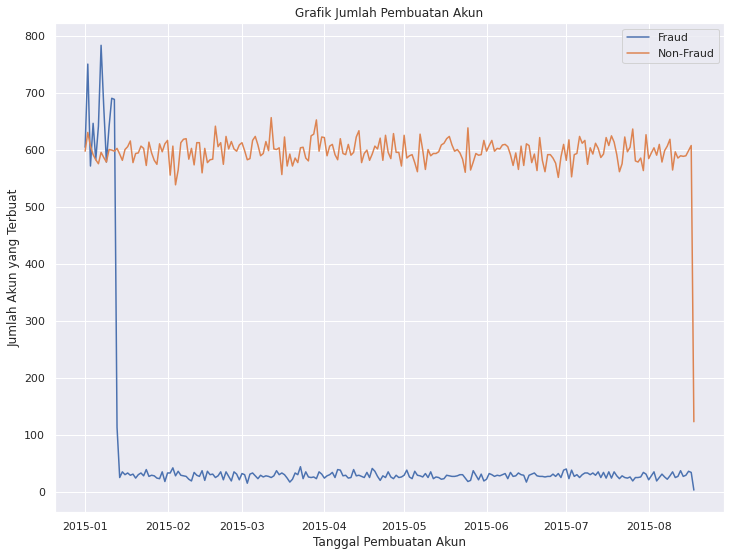

In [ ]:
#grafik jumlah pembuatan akun dalam tahun 2015 yang dibedakan berdasarkan kasus penipuan atau bukan
data_std_fraud=df[df['is_fraud']==1].groupby('signup_time_date').agg({'signup_time_date':'count'}).sort_index()
data_std_nofraud=df[df['is_fraud']==0].groupby('signup_time_date').agg({'signup_time_date':'count'}).sort_index()
sns.set(rc={'figure.figsize':(12,9)})
fig, axs= plt.subplots()
plt.plot(data_std_fraud.index, data_std_fraud, label = "Fraud")
plt.plot(data_std_nofraud.index, data_std_nofraud, label = "Non-Fraud")
axs.set_xlabel('Tanggal Pembuatan Akun')
axs.set_ylabel('Jumlah Akun yang Terbuat')
plt.title('Grafik Jumlah Pembuatan Akun') #judul dari plot
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembentukan Akun')

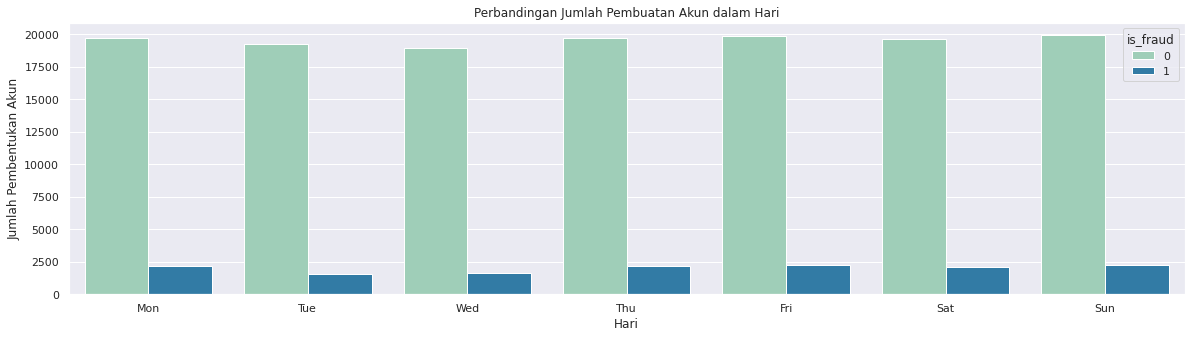

In [ ]:
#bar plot dari banyaknya purchase dalam hari
order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.set(rc={'figure.figsize':(20,5)}) #ukuran plot
sns.countplot(df['signup_time_dayofweek'],data=df,palette='YlGnBu',order=order,hue='is_fraud')
plt.title('Perbandingan Jumlah Pembuatan Akun dalam Hari') #judul dari plot
plt.xlabel('Hari') #label pada sumbu x
plt.ylabel('Jumlah Pembentukan Akun') #label pada sumbu y

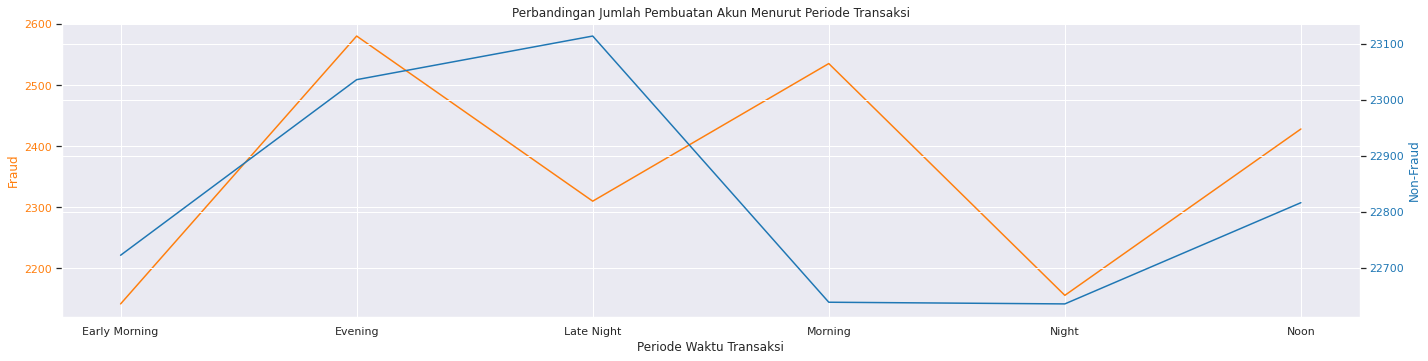

In [ ]:
#Line plot untuk keduanya dengan skala yang berbeda agar bisa dibandingkan "behaviour" kasus penipuan dan bukan
data_st_fraud=df[df['is_fraud']==1].groupby('signup_time_period').agg({'signup_time_period':'count'}).sort_index()
data_st_nofraud=df[df['is_fraud']==0].groupby('signup_time_period').agg({'signup_time_period':'count'}).sort_index()
fig, ax1 = plt.subplots()
color = 'tab:orange'
ax1.set_xlabel('Periode Waktu Transaksi')
ax1.set_ylabel('Fraud', color=color)
ax1.plot(data_st_fraud, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Non-Fraud', color=color)  # we already handled the x-label with ax1
ax2.plot(data_st_nofraud, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Perbandingan Jumlah Pembuatan Akun Menurut Periode Transaksi') #judul dari plot
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembentukan Akun')

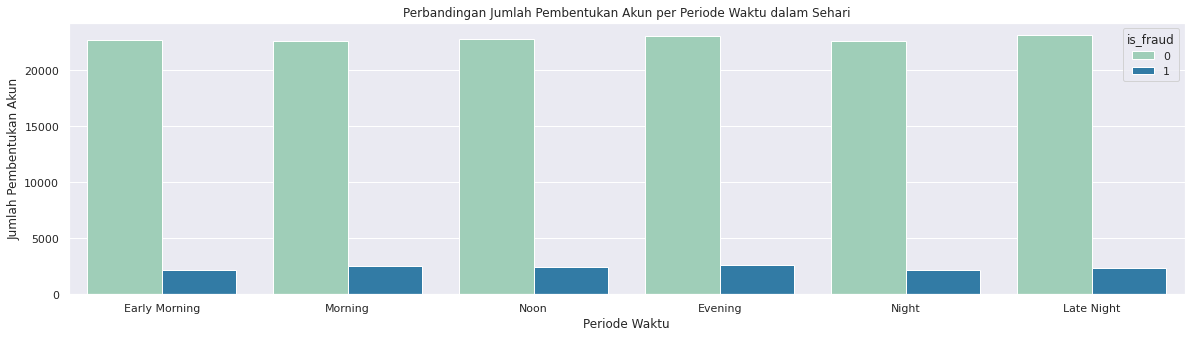

In [ ]:
#bar plot dari banyaknya purchase dalam 6 periode waktu dalam sehari
order=['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night']
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(df['signup_time_period'],data=df,palette='YlGnBu',order=order,hue='is_fraud')
plt.title('Perbandingan Jumlah Pembentukan Akun per Periode Waktu dalam Sehari') #judul dari plot
plt.xlabel('Periode Waktu') #label pada sumbu x
plt.ylabel('Jumlah Pembentukan Akun') #label pada sumbu y

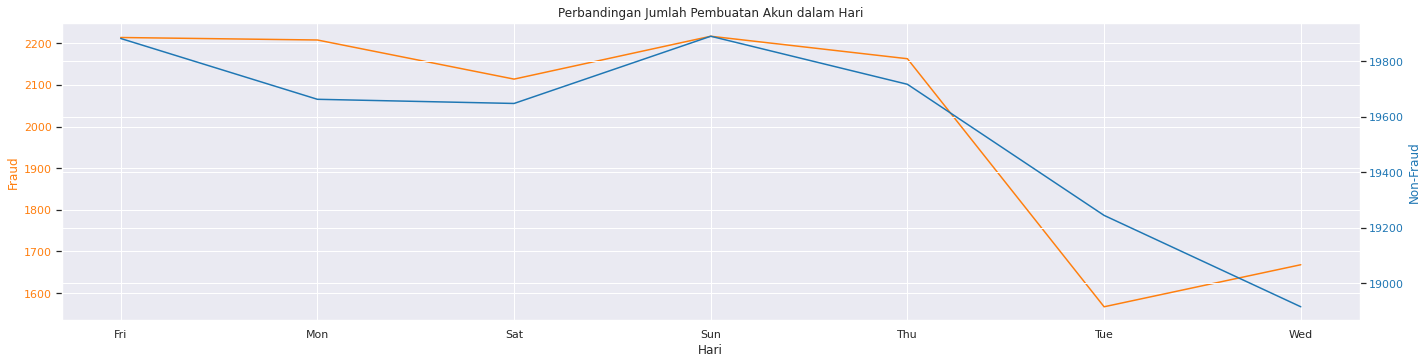

In [ ]:
#line plot untuk keduanya dengan skala yang berbeda agar bisa dibandingkan "behaviour" kasus penipuan dan bukan
data_stp_fraud=df[df['is_fraud']==1].groupby('signup_time_dayofweek').agg({'signup_time_dayofweek':'count'}).sort_index()
data_stp_nofraud=df[df['is_fraud']==0].groupby('signup_time_dayofweek').agg({'signup_time_dayofweek':'count'}).sort_index()

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Hari')
ax1.set_ylabel('Fraud', color=color)
ax1.plot(data_stp_fraud, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Non-Fraud', color=color)  # we already handled the x-label with ax1
ax2.plot(data_stp_nofraud, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Perbandingan Jumlah Pembuatan Akun dalam Hari') #judul dari plot
plt.show()

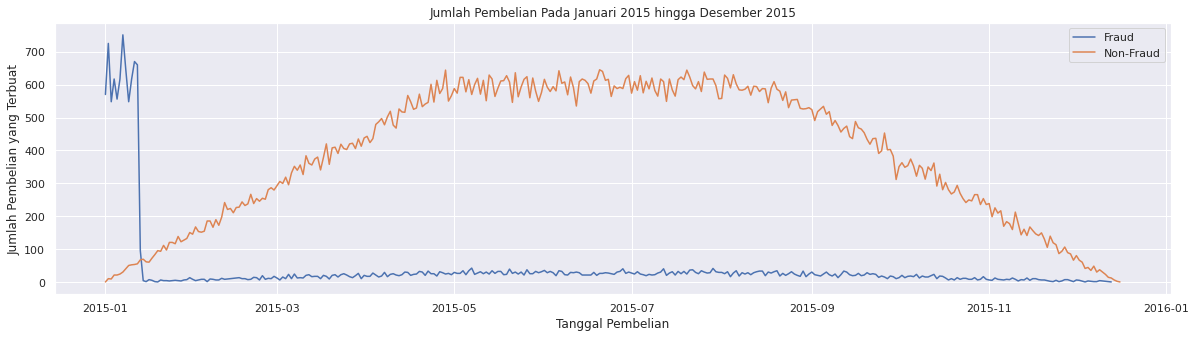

In [ ]:
#grafik jumlah pembelian dalam tahun 2015 yang dibedakan berdasarkan kasus penipuan atau bukan
data_ptd_fraud=df[df['is_fraud']==1].groupby('purchase_time_date').agg({'purchase_time_date':'count'}).sort_index()
data_ptd_nofraud=df[df['is_fraud']==0].groupby('purchase_time_date').agg({'purchase_time_date':'count'}).sort_index()
fig, axs= plt.subplots()
plt.plot(data_ptd_fraud.index, data_ptd_fraud, label = "Fraud")
plt.plot(data_ptd_nofraud.index, data_ptd_nofraud, label = "Non-Fraud")
axs.set_xlabel('Tanggal Pembelian')
axs.set_ylabel('Jumlah Pembelian yang Terbuat')
plt.title('Jumlah Pembelian Pada Januari 2015 hingga Desember 2015') #judul dari plot
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembelian')

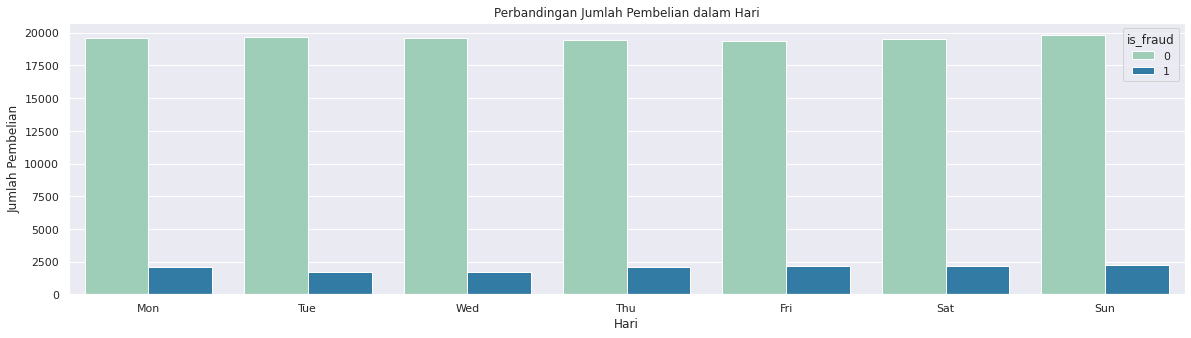

In [ ]:
#bar plot dari banyaknya purchase dalam hari
order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.set(rc={'figure.figsize':(20,5)}) #ukuran plot
sns.countplot(df['purchase_time_dayofweek'],data=df,palette='YlGnBu',order=order,hue='is_fraud')
plt.title('Perbandingan Jumlah Pembelian dalam Hari') #judul dari plot
plt.xlabel('Hari') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

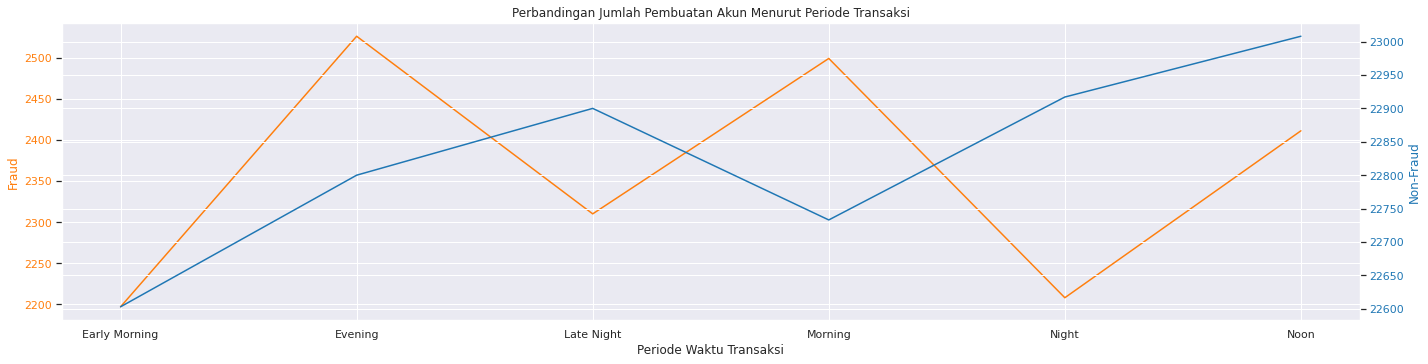

In [ ]:
#line plot untuk keduanya dengan skala yang berbeda agar bisa dibandingkan "behaviour" kasus penipuan dan bukan
data_pt_fraud=df[df['is_fraud']==1].groupby('purchase_time_period').agg({'purchase_time_period':'count'}).sort_index()
data_pt_nofraud=df[df['is_fraud']==0].groupby('purchase_time_period').agg({'purchase_time_period':'count'}).sort_index()
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Periode Waktu Transaksi')
ax1.set_ylabel('Fraud', color=color)
ax1.plot(data_pt_fraud, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Non-Fraud', color=color)  # we already handled the x-label with ax1
ax2.plot(data_pt_nofraud, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Perbandingan Jumlah Pembuatan Akun Menurut Periode Transaksi') #judul dari plot
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembelian')

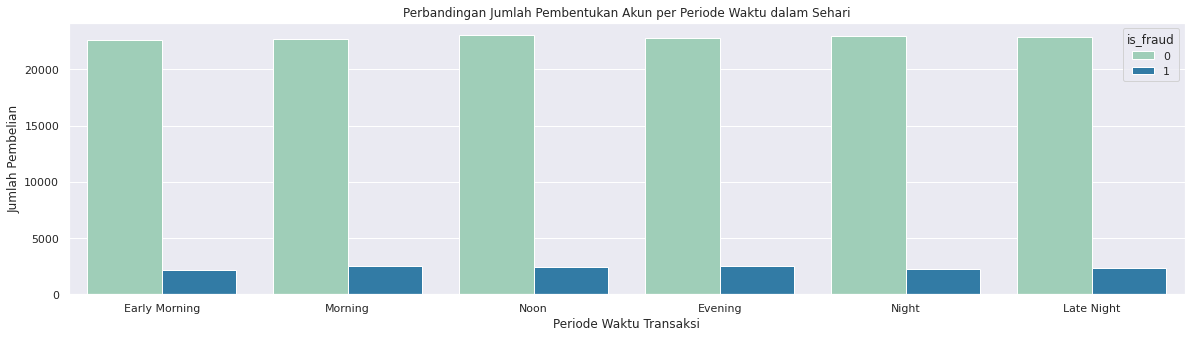

In [ ]:
#bar plot dari banyaknya purchase dalam 6 periode waktu dalam sehari
order=['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night']
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(df['purchase_time_period'],data=df,palette='YlGnBu',order=order,hue='is_fraud')
plt.title('Perbandingan Jumlah Pembelian per Periode Waktu dalam Sehari') #judul dari plot
plt.xlabel('Periode Waktu Transaksi') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

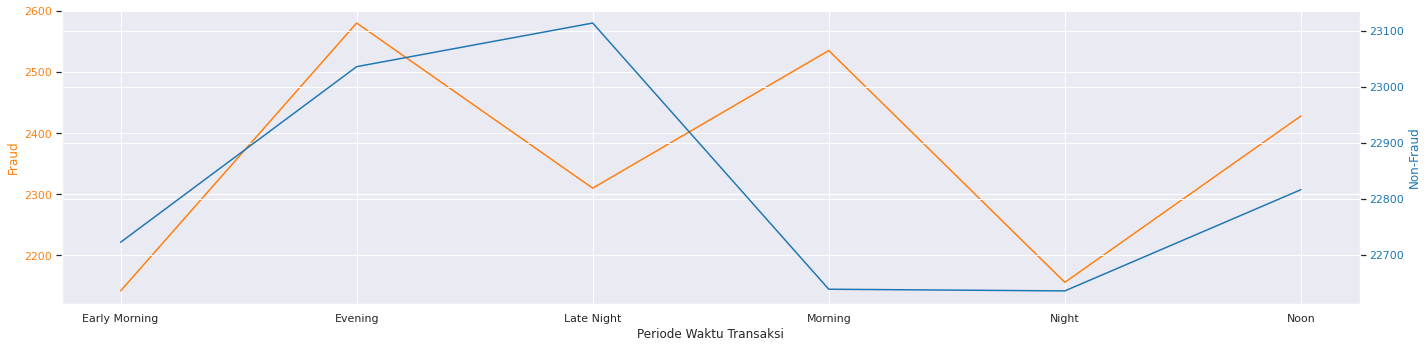

In [ ]:
#line plot untuk keduanya dengan skala yang berbeda agar bisa dibandingkan "behaviour" kasus penipuan dan bukan
data_ptp_fraud=df[df['is_fraud']==1].groupby('signup_time_period').agg({'signup_time_period':'count'}).sort_index()
data_ptp_nofraud=df[df['is_fraud']==0].groupby('signup_time_period').agg({'signup_time_period':'count'}).sort_index()

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Periode Waktu Transaksi')
ax1.set_ylabel('Fraud', color=color)
ax1.plot(data_ptp_fraud, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Non-Fraud', color=color)  # we already handled the x-label with ax1
ax2.plot(data_ptp_nofraud, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### D. Jumlah kasus *fraud* dan tidak *fraud* berdasarkan rentang waktu dari pembuatan akun hingga terjadinya transaksi

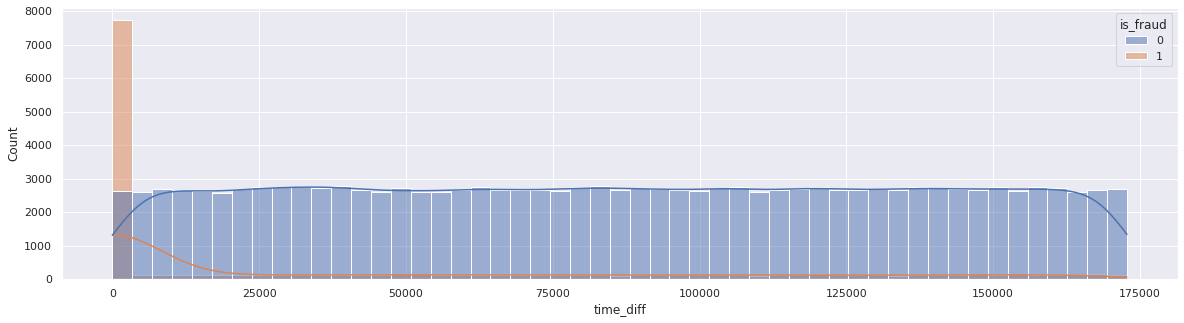

In [ ]:
sns.histplot(data=df, x="time_diff", hue="is_fraud",kde=True)

Kasus penipuan cenderung lebih banyak terjadi pada jeda waktu yang pendek. Hal ini memberikan kita infromasi bahwa kasus penipuan sering dilakukan oleh oknum yang baru membuat akun. Sehingga rekomendasi kami untuk pihak e-commerce adalah untuk meningkatkan keamanan pada pengguna pertama yang baru membuat akun. Dalam hal ini peningkatan keamanan dapat dilakukan dengan menahan transaksi yang sudah terjadi dalam beberapa jam pertama. Artinya walaupun transaksi sudah terjadi  namun sebaiknya pemesanan belum diproses langsung ke penjual. Hal ini dilakukan untuk memberi kesempatan kepada pihak yang dirugikan untuk melaporkan penipuan ini.

### E. Persebaran jumlah kasus *fraud* berdasarkan jenis kelamin, *browser* yang digunakan, dan *source* transaksi terjadi

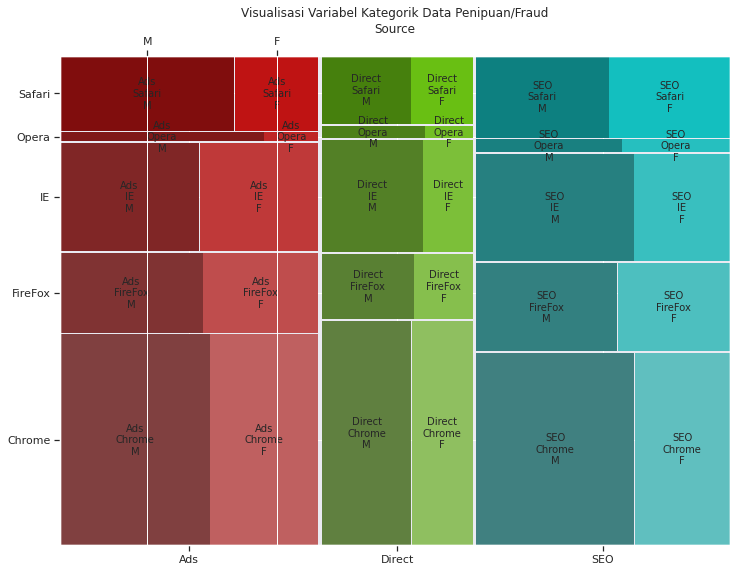

In [ ]:
#digunakan mosaic plot untuk melihat persebaran data berdasarkan variabel kategorik 'source','browser', dan 'sex'
sns.set(rc={'figure.figsize':(12,9)})
mosaic(df[df['is_fraud']==1], ['source','browser','sex'])
plt.title('Visualisasi Variabel Kategorik Data Penipuan/Fraud') #untuk memberikan judul pada plot
plt.xlabel('Source') #untuk label pada sumbu x
plt.ylabel('Browser') #untuk label pada sumbu y
plt.show()

### F. Persebaran jumlah kasus tidak *fraud* berdasarkan jenis kelamin, *browser* yang digunakan, dan *source* transaksi terjadi

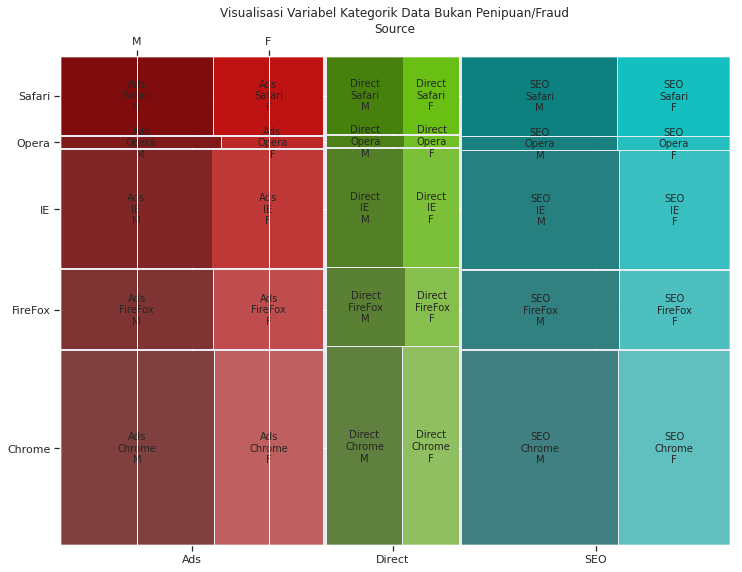

In [ ]:
#digunakan mosaic plot untuk mendapat gambaran persebaran data kasus tidak fraud berdasarkan variabel kategorik 'source','browser',dan 'sex'
sns.set(rc={'figure.figsize':(12,9)})
mosaic(df[df['is_fraud']==0], ['source','browser','sex'])
plt.title('Visualisasi Variabel Kategorik Data Bukan Penipuan/Fraud') #untuk memberikan judul pada plot
plt.xlabel('Source') #untuk label pada sumbu x
plt.ylabel('Browser') #untuk label pada sumbu y
plt.show()

### G. Jumlah kasus *fraud* dan tidak *fraud* berdasarkan *source* terjadinya transaksi,  *browser* yang digunakan, dan jenis kelamin

[Text(0.5, 1.0, 'Count Plot Jenis Source')]

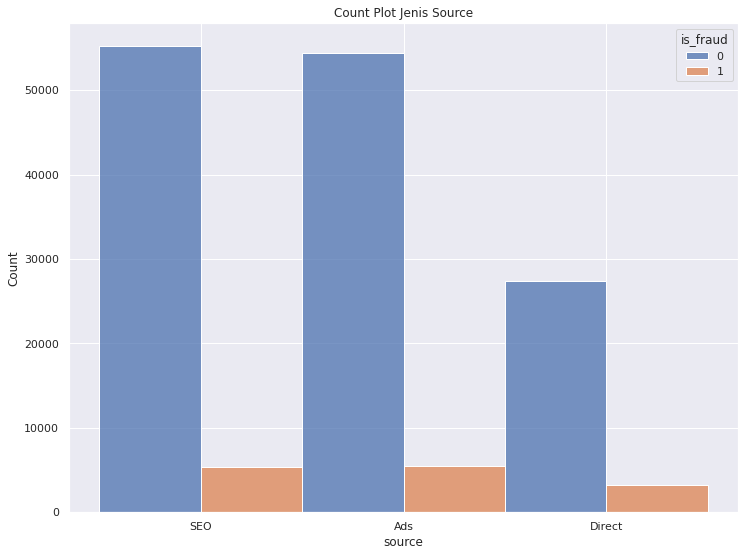

In [ ]:
#jumlah kasus penipuan dan bukan berdasarkan jenis source
sns.set(rc={'figure.figsize':(12,9)})
sns.histplot(x='source',data=df,hue='is_fraud',multiple="dodge").set(title='Count Plot Jenis Source')

In [ ]:
#untuk mengetahui jumlah kasus penipuan untuk setiap sourcenya
df[df['is_fraud']==1]['source'].value_counts()

Ads       5513
SEO       5412
Direct    3226
Name: source, dtype: int64

In [ ]:
#untuk mengetahui jumlah kasus bukan penipuan untuk setiap sourcenya
df[df['is_fraud']==0]['source'].value_counts()

SEO       55203
Ads       54368
Direct    27390
Name: source, dtype: int64

Persentase kejadian penipuan yang berasal dari SEO adalah sebesar 9,8038%, dari Ads sebanyak 10,140155%, dan dari Direct sebesar 11,77801%.
Jadi secara keseluruhan source Direct memiliki persentase kejadian penipuan yang lebih tinggi dibanidng yang lainnya walaupun kasus penipuan pada source ini lebih jarang terjadi dibanding source lainnya

[Text(0.5, 1.0, 'Count Plot Jenis Browser')]

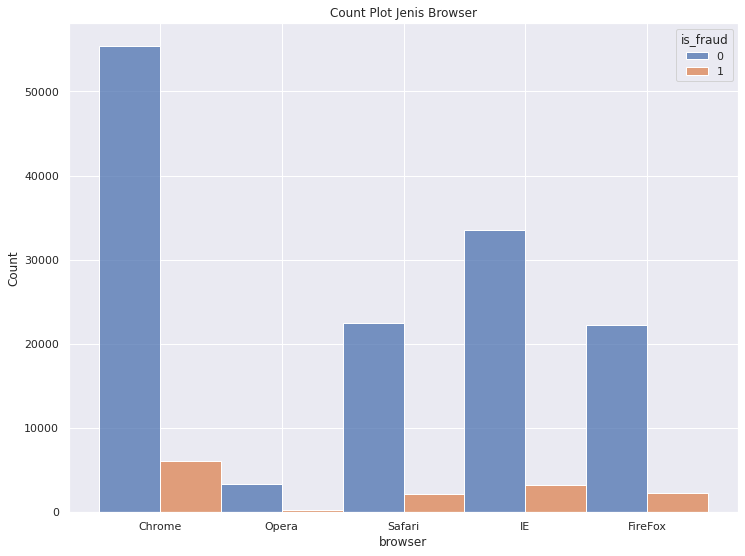

In [ ]:
#jumlah kasus penipuan dan bukan berdasarkan jenis browser
sns.set(rc={'figure.figsize':(12,9)})
sns.histplot(x='browser',data=df,hue='is_fraud',multiple="dodge").set(title='Count Plot Jenis Browser')

In [ ]:
#untuk mengetahui jumlah kasus penipuan untuk setiap brower yang digunakan
df[df['is_fraud']==1]['browser'].value_counts()

Chrome     6069
IE         3187
FireFox    2342
Safari     2225
Opera       328
Name: browser, dtype: int64

In [ ]:
#untuk mengetahui jumlah kasus bukan penipuan untuk setiap brower yang digunakan
df[df['is_fraud']==0]['browser'].value_counts()

Chrome     55363
IE         33540
Safari     22442
FireFox    22268
Opera       3348
Name: browser, dtype: int64

Persentase kejadian penipuan yang berasal dari Chrome adalah sebesar 10,96%, dari IE sebanyak 9,502%, dari Safari sebesar 10,03%, dari Firefox sebesar 0,0010517%, dan dari Opera sebesar 9,796%. Jadi secara keseluruhan penipuan dapat terjadi di browser mana saja mengingat persentase kasus penipuan cenderung sama kecuali untuk browser Chrome yang lebih tinggi dibandingkan browser lainnya. 

[Text(0.5, 1.0, 'Count Plot Jenis Kelamin')]

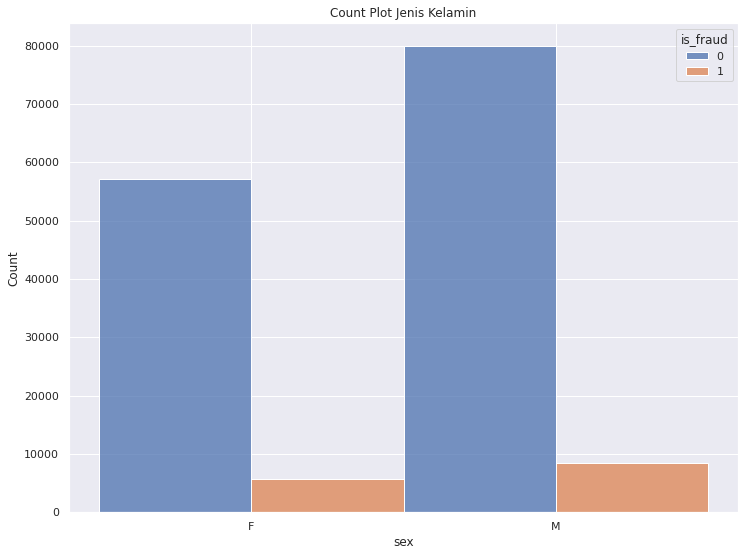

In [ ]:
#jumlah kasus penipuan dan bukan berdasarkan jenis kelamin
sns.set(rc={'figure.figsize':(12,9)})
sns.histplot(x='sex',data=df,hue='is_fraud',multiple="dodge").set(title='Count Plot Jenis Kelamin')

### H. Jumlah kasus penipuan dan bukan penipuan dari dataset yang digunakan

In [ ]:
df['is_fraud']=df['is_fraud'].astype('int')

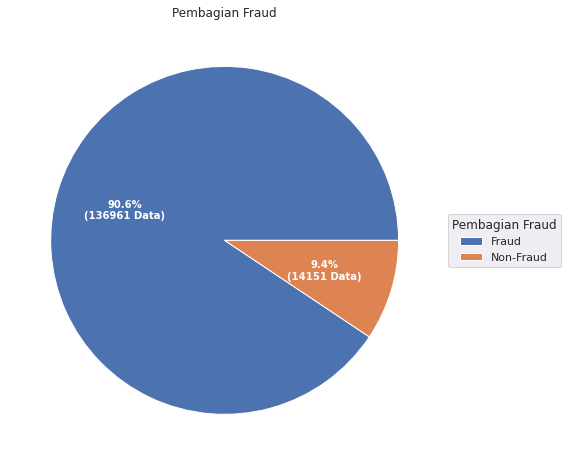

In [ ]:
per = (df['is_fraud'].value_counts()).values
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))
label = ["Fraud",
          "Non-Fraud"]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} Data)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(per, autopct=lambda pct: func(pct, per),
                                  textprops=dict(color="w"))

ax.legend(wedges, label,
          title="Pembagian Fraud",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Pembagian Fraud")

plt.show()

# ***Classification***


---



Pada proses *classification*, variabel 'signup_time', 'purchase_time', 'signup_time_date', 'purchase_time_date', 'signup_time_dayofweek', 'signup_time_period', 'purchase_time_dayofweek', dan	'purchase_time_period' tidak akan digunakan, sehingga akan dibuang.

In [ ]:
df.drop(['signup_time','purchase_time','signup_time_date','purchase_time_date'],axis=1,inplace=True)

In [ ]:
#one hot encoding variabel kategorik
map = {'M': 1,
       'F': 0}

df['sex'] = df['sex'].map(map)

df=pd.concat([df,pd.get_dummies(df['source'],prefix='source')],axis=1)
df.drop('source',axis=1,inplace=True)

df=pd.concat([df,pd.get_dummies(df['browser'],prefix='browser')],axis=1)
df.drop('browser',axis=1,inplace=True)

df=pd.concat([df,pd.get_dummies(df['signup_time_dayofweek'],prefix='signup_DOW')],axis=1)
df.drop('signup_time_dayofweek',axis=1,inplace=True)

df=pd.concat([df,pd.get_dummies(df['signup_time_period'],prefix='signup_p')],axis=1)
df.drop('signup_time_period',axis=1,inplace=True)

df=pd.concat([df,pd.get_dummies(df['purchase_time_dayofweek'],prefix='purchase_DOW')],axis=1)
df.drop('purchase_time_dayofweek',axis=1,inplace=True)

df=pd.concat([df,pd.get_dummies(df['purchase_time_period'],prefix='purchase_p')],axis=1)
df.drop('purchase_time_period',axis=1,inplace=True)

Variabel yang digunakan dalam menentukan transaksi sebagai fraud merupakan variabel yang hampir saling independen kecuali variabel hot encoding dari suatu variabel kategorik (terlihat dari heatmap di atas)

In [ ]:
#transformasi variabel string jadi kategorik lagi
for col in ['sex','source_Ads', 'source_Direct','source_SEO','browser_Chrome','browser_FireFox','browser_IE','browser_Opera','browser_Safari','is_fraud', 'signup_DOW_Fri',
       'signup_DOW_Mon', 'signup_DOW_Sat', 'signup_DOW_Sun', 'signup_DOW_Thu',
       'signup_DOW_Tue', 'signup_DOW_Wed', 'signup_p_Early Morning',
       'signup_p_Evening', 'signup_p_Late Night', 'signup_p_Morning',
       'signup_p_Night', 'signup_p_Noon', 'purchase_DOW_Fri',
       'purchase_DOW_Mon', 'purchase_DOW_Sat', 'purchase_DOW_Sun',
       'purchase_DOW_Thu', 'purchase_DOW_Tue', 'purchase_DOW_Wed',
       'purchase_p_Early Morning', 'purchase_p_Evening',
       'purchase_p_Late Night', 'purchase_p_Morning', 'purchase_p_Night',
       'purchase_p_Noon']:
    df[col] = df[col].astype('category')

In [ ]:
df['is_fraud'].value_counts()

0    136961
1     14151
Name: is_fraud, dtype: int64

In [ ]:
y = df['is_fraud']
X = df.drop(['is_fraud'],axis=1)

In [ ]:
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)
np.unique(y_over,return_counts=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1]), array([136961, 136961]))

SMOTE merupakan oversampling yang mempertimbangkan nearest neighbour dan support vector suatu data, sehingga data sintetis yang dihasilkan akan sangat identik dengan data aslinya.

In [ ]:
#Normalisasi data hasil oversampling dengan SMOTE
scaler = StandardScaler()
scaler.fit(X_over)
X = pd.DataFrame(preprocessing.normalize(X_over), columns=X.columns)
y = pd.DataFrame(y_over)
df = pd.concat([X,y],axis=1)
df.rename(columns={0:'is_fraud'}, inplace=True)
df.head()

,purchase_value,sex,age,time_diff,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,signup_DOW_Fri,signup_DOW_Mon,signup_DOW_Sat,signup_DOW_Sun,signup_DOW_Thu,signup_DOW_Tue,signup_DOW_Wed,signup_p_Early Morning,signup_p_Evening,signup_p_Late Night,signup_p_Morning,signup_p_Night,signup_p_Noon,purchase_DOW_Fri,purchase_DOW_Mon,purchase_DOW_Sat,purchase_DOW_Sun,purchase_DOW_Thu,purchase_DOW_Tue,purchase_DOW_Wed,purchase_p_Early Morning,purchase_p_Evening,purchase_p_Late Night,purchase_p_Morning,purchase_p_Night,purchase_p_Noon,is_fraud
0,0.000453,0.000013,0.000519,1.000000,0.000000,0.0,0.000013,0.000013,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000013,0.0,0.000000,0.000000,0.0,0.0,0.000013,0.0,0.0,0.000000,0.000013,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000013,0.0,0.0,0.000000,0
1,0.052616,0.000000,0.174289,0.983255,0.003288,0.0,0.000000,0.003288,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.003288,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.003288,0.0,0.0,0.003288,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.003288,0.0,0.0,0.000000,0
2,0.272009,0.018134,0.961098,0.000000,0.000000,0.0,0.018134,0.000000,0.0,0.0,0.018134,0.000000,0.0,0.0,0.0,0.000000,0.018134,0.000000,0.0,0.000000,0.018134,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.018134,0.0,0.000000,0.0,0.018134,0.000000,0.0,0.0,0.000000,1
3,0.005365,0.000122,0.004999,0.999973,0.000000,0.0,0.000122,0.000000,0.0,0.0,0.000000,0.000122,0.0,0.0,0.0,0.000000,0.000000,0.000122,0.0,0.000000,0.000000,0.0,0.0,0.000122,0.0,0.0,0.000122,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000122,0
4,0.000537,0.000014,0.000619,1.000000,0.000014,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000014,0.0,0.0,0.0,0.000000,0.000000,0.000014,0.0,0.000014,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000014,0.0,0.000014,0.000000,0.0,0.0,0.000000,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y) #membagi data menjadi data training dan testing

In [ ]:
#Training decision tree dengan seleksi fitur
dtc = DecisionTreeClassifier(random_state=42)
rfecv = RFECV(estimator=dtc, cv=StratifiedKFold(10), scoring='recall',n_jobs=-1, min_features_to_select = 5, step=3,verbose=2)
rfecv.fit(X_train, y_train)
print('Optimal number of features: {}'.format(rfecv.n_features_))

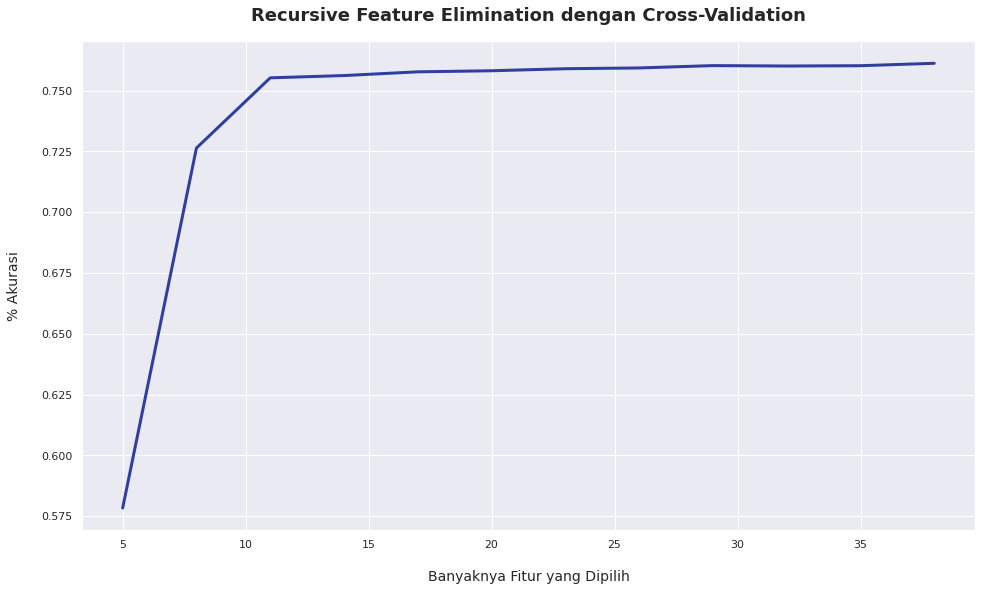

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination dengan Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Banyaknya Fitur yang Dipilih', fontsize=14, labelpad=20)
plt.ylabel('% Akurasi', fontsize=14, labelpad=20)
plt.plot(range(5, X.shape[1]+1,3), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
#drop fitur yang tidak didukung oleh refcv, tapi karena akurasi tertinggi dicapai jika menggunakan semua variabel independen maka tidak ada variabel yang didrop
print(np.where(rfecv.support_ == False)[0])

X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#mencari hyparameter untuk membentuk model paling optimal
dtc= DecisionTreeClassifier(random_state=42)
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":[5,10,15,20,None],
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

grid = RandomizedSearchCV(dtc,param_dict,cv=10,verbose=1,n_jobs=-1,scoring='recall')
grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
           

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))
print("Best score is {}".format(grid.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini'}
Best score is 0.7637078411833853


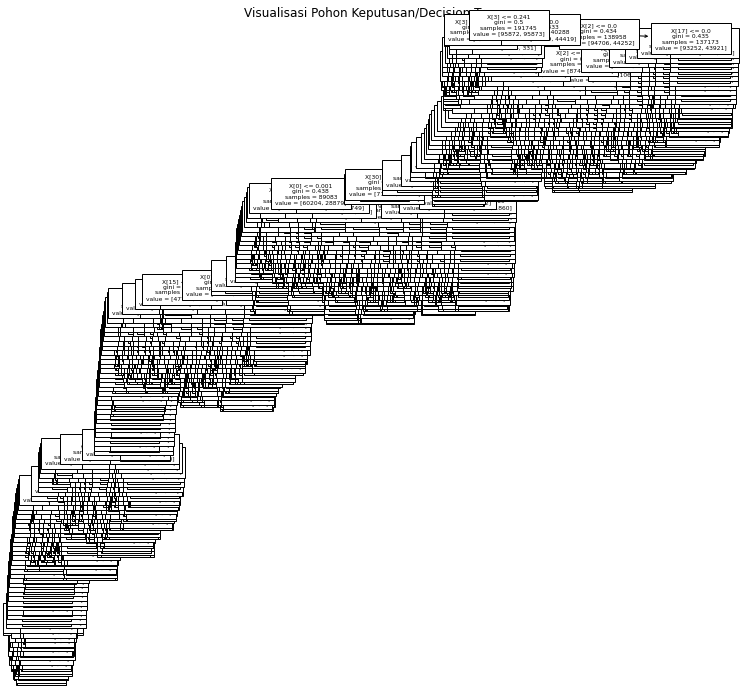

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(grid.best_estimator_, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)
plt.title('Visualisasi Pohon Keputusan/Decision Tree') #untuk memberikan judul pada plot
plt.show()

In [ ]:
#metrik untuk mengukur performa model (hanya recall yang dipertimbangkan)
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     41089
           1       0.97      0.75      0.85     41088

    accuracy                           0.86     82177
   macro avg       0.88      0.86      0.86     82177
weighted avg       0.88      0.86      0.86     82177



In [ ]:
#confusion matrix untuk mengetahui banyak TP, FP, TN, FN
confusion_matrix(y_test, y_pred)

array([[40102,   987],
       [10199, 30889]])

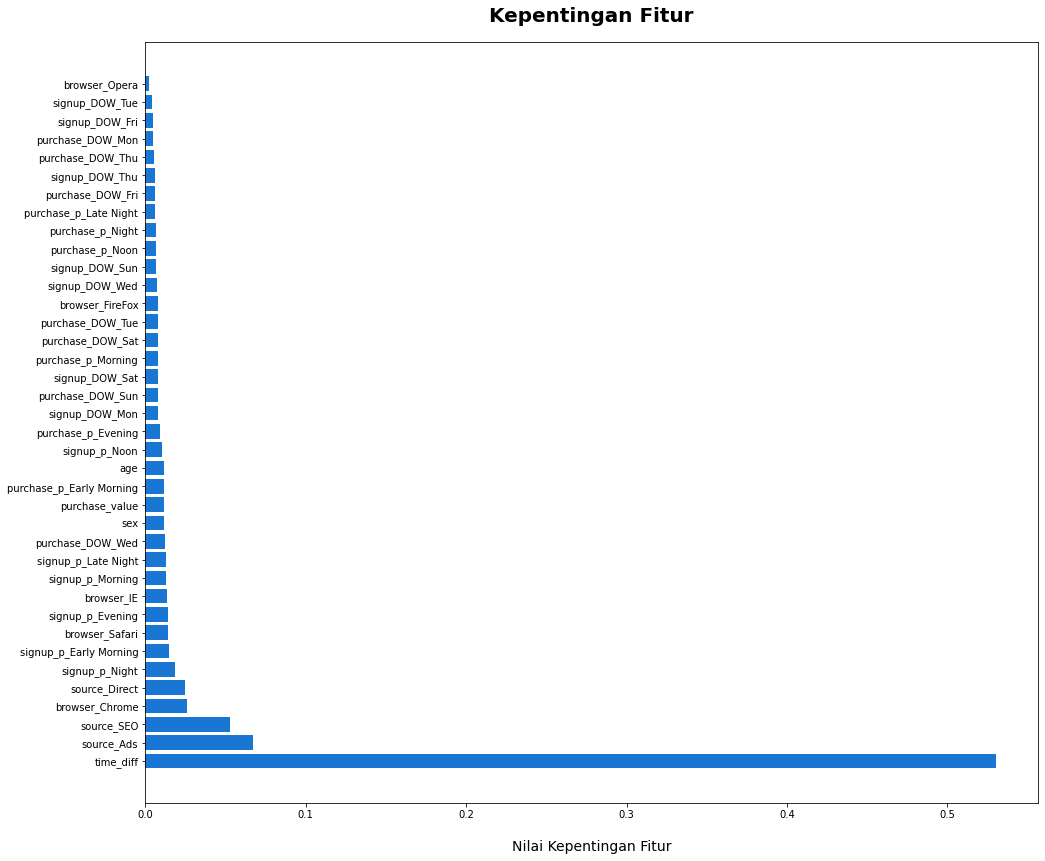

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns
dset['importance'] = grid.best_estimator_.feature_importances_
dset['attr']=dset['attr'].astype(str)
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('Kepentingan Fitur', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Nilai Kepentingan Fitur', fontsize=14, labelpad=20)
plt.show()

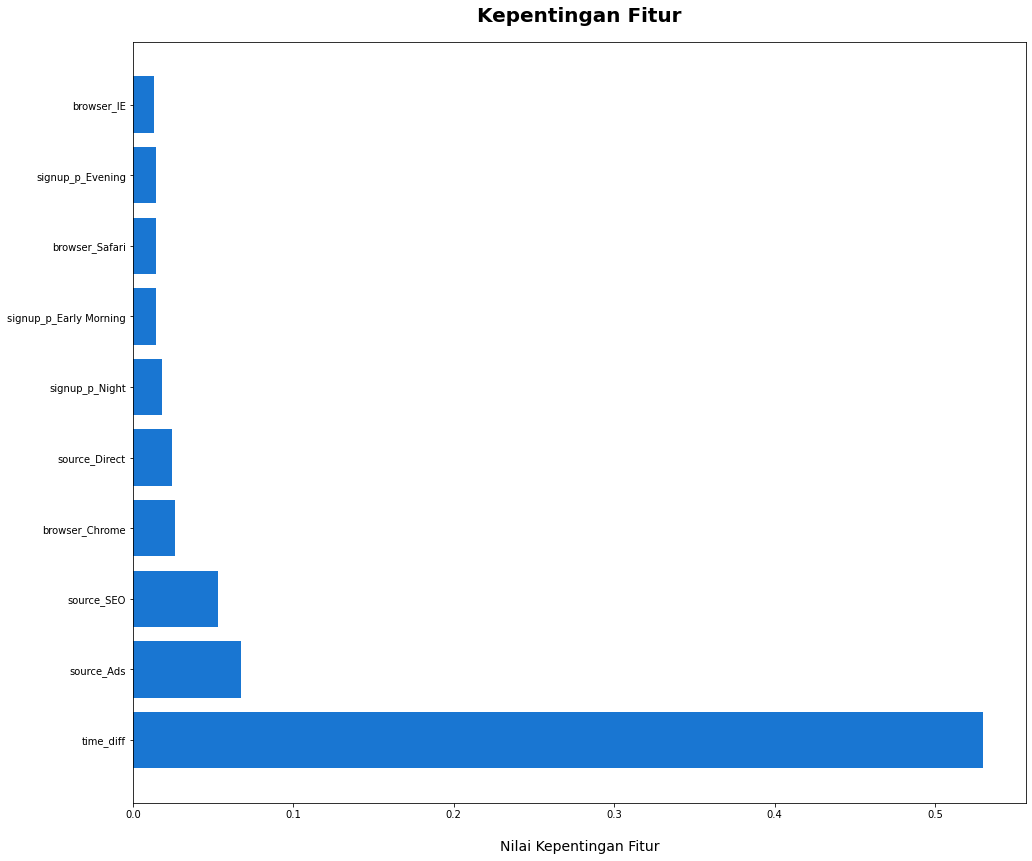

In [ ]:
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'][:10], width=dset['importance'][:10], color='#1976D2')
plt.title('Kepentingan Fitur', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Nilai Kepentingan Fitur', fontsize=14, labelpad=20)
plt.show()

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.921


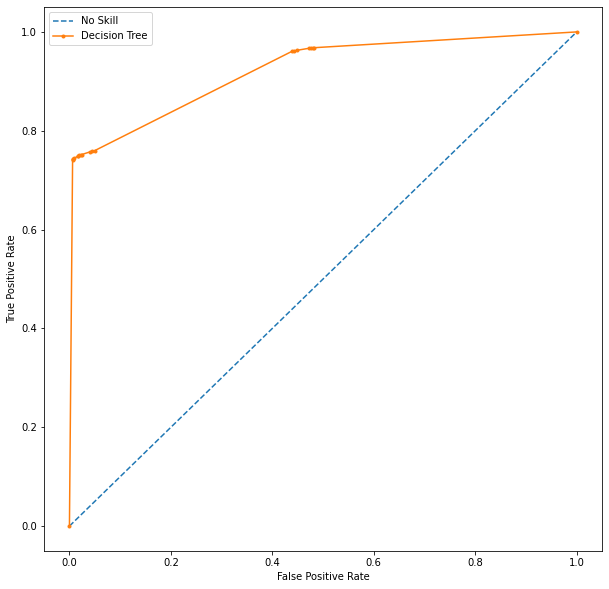

In [ ]:
dt_probs = grid.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.figure(figsize=(10, 10))
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.847 auc=0.943


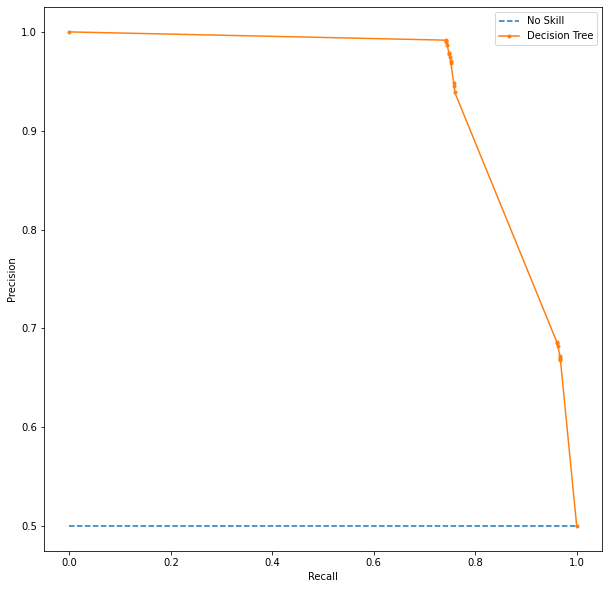

In [ ]:
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
dt_f1, dt_auc = f1_score(y_test, y_pred), auc(dt_recall, dt_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = y_test.value_counts()[1] / len(y_test)
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, cv=StratifiedKFold(10), scoring='recall',n_jobs=-1,verbose=1, min_features_to_select = 5, step=3)
rfecv.fit(X_train, y_train)
print('Optimal number of features: {}'.format(rfecv.n_features_))

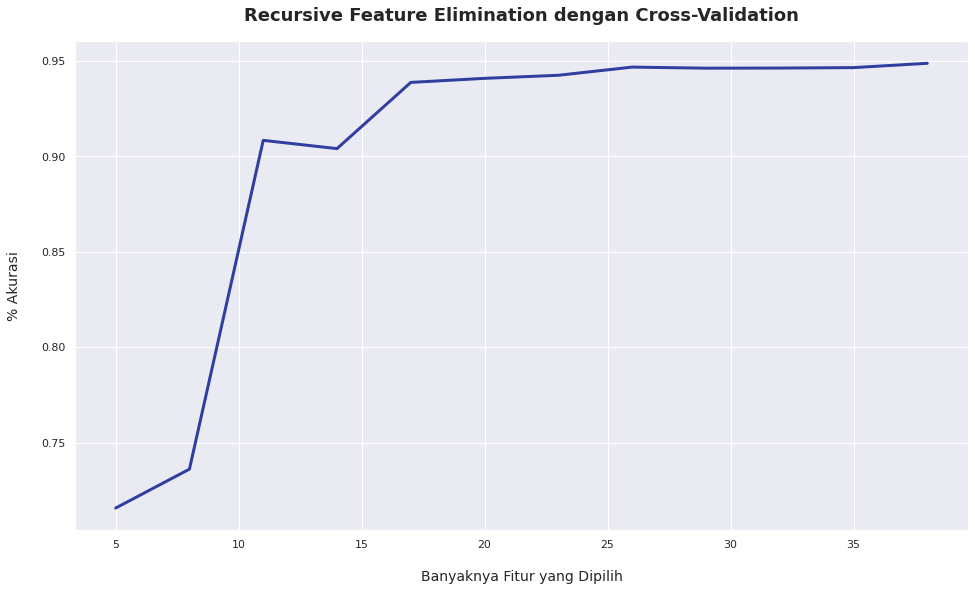

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination dengan Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Banyaknya Fitur yang Dipilih', fontsize=14, labelpad=20)
plt.ylabel('% Akurasi', fontsize=14, labelpad=20)
plt.plot(range(5, X.shape[1]+1,3), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print(np.where(rfecv.support_ == False)[0])

X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
rfc= RandomForestClassifier(random_state=42)
param_dict2={"n_estimators" : [50 , 100, 150],
             "criterion":['gini','entropy'],
             "max_depth" : [5,10,15,20,None],
             "min_samples_split" : range(1,10),
             "min_samples_leaf" : range(1,5)
}

grid2 = RandomizedSearchCV(rfc,param_dict2,cv=10,verbose=1,n_jobs=-1,scoring='recall')
grid2.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 52.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(grid2.best_params_))
print("Best score is {}".format(grid2.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
Best score is 0.9375945989473733


In [ ]:
y_pred = grid2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     41089
           1       1.00      0.92      0.96     41088

    accuracy                           0.96     82177
   macro avg       0.96      0.96      0.96     82177
weighted avg       0.96      0.96      0.96     82177



In [ ]:
confusion_matrix(y_test, y_pred)

array([[41076,    13],
       [ 3460, 37628]])

In [ ]:
from sklearn.tree import export_graphviz
import pydot
tree =grid2.best_estimator_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, rounded = False, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('/content/tree.jpg')

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(grid2.best_params_))
print("Best score is {}".format(grid2.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini'}
Best score is 0.9279151799959957


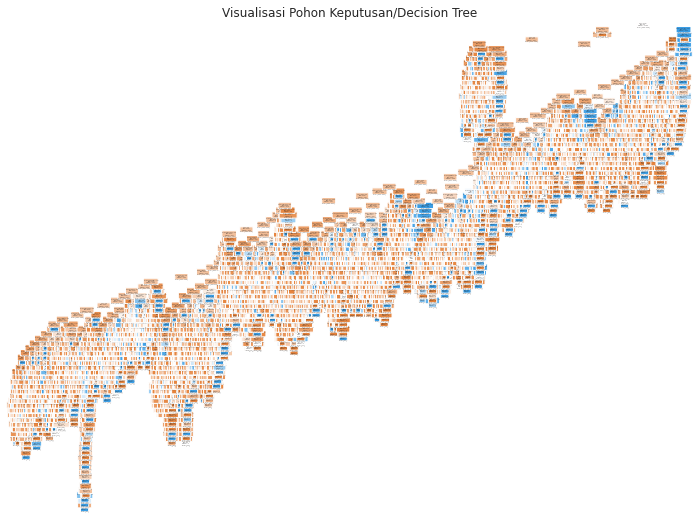

In [ ]:
plot_tree(grid2.best_estimator_.estimators_[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)
plt.savefig('tree2_high_dpi', dpi=100)
plt.title('Visualisasi Pohon Keputusan/Decision Tree') #untuk memberikan judul pada plot
plt.show()

In [ ]:
y_pred = grid2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     41089
           1       1.00      0.86      0.92     41088

    accuracy                           0.93     82177
   macro avg       0.94      0.93      0.93     82177
weighted avg       0.94      0.93      0.93     82177



In [ ]:
confusion_matrix(y_test, y_pred)

array([[41077,    12],
       [ 5914, 35174]])

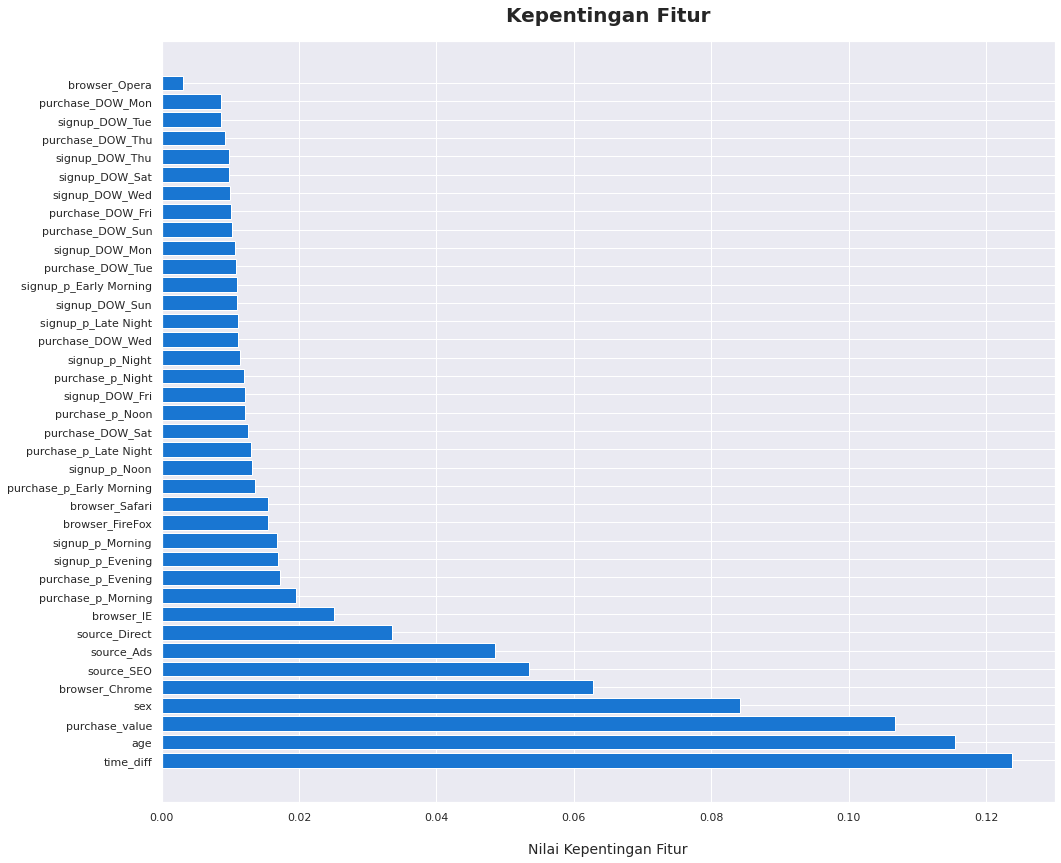

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns
dset['importance'] = grid2.best_estimator_.feature_importances_
dset['attr']=dset['attr'].astype(str)
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('Kepentingan Fitur', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Nilai Kepentingan Fitur', fontsize=14, labelpad=20)
plt.show()

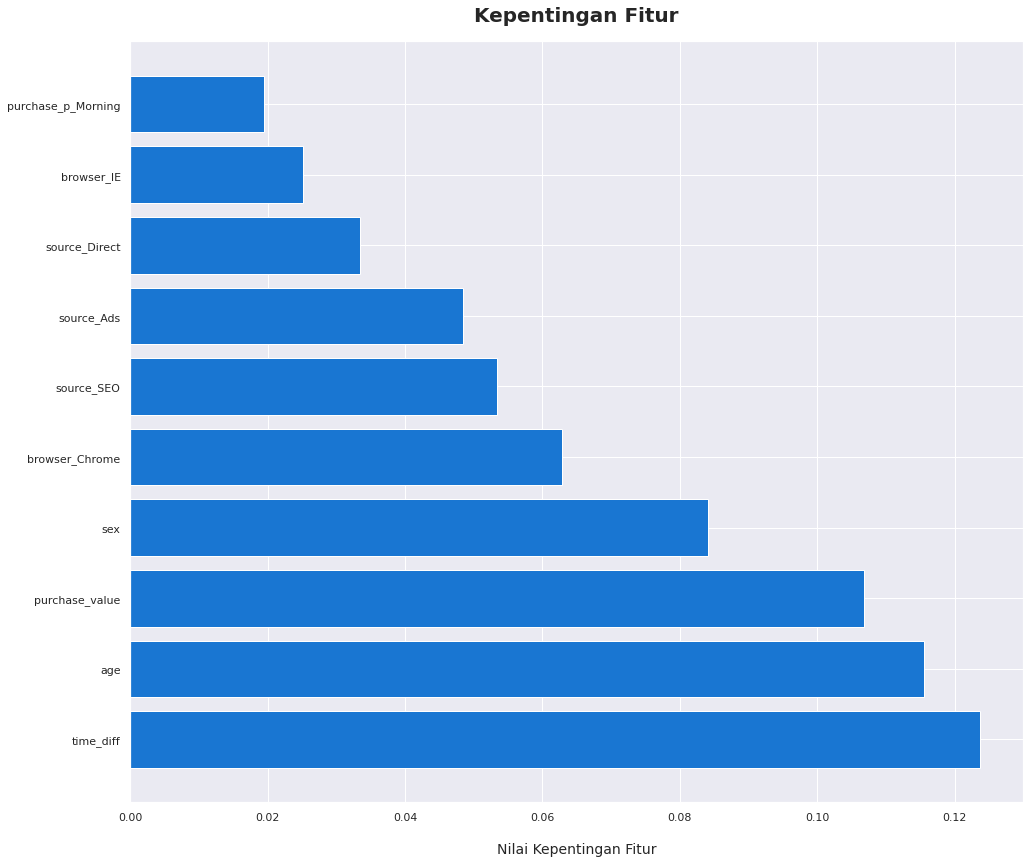

In [ ]:
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'][:10], width=dset['importance'][:10], color='#1976D2')
plt.title('Kepentingan Fitur', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Nilai Kepentingan Fitur', fontsize=14, labelpad=20)
plt.show()

pada kedua model (Decision Tree dan Random forest, time_diff memiliki pengaruh paling penting dalam mengkategorikan suatu transaksi sebagi fraud atau tidak. Variabel time_diff satu-satunya variabel yang memiliki nilai feature_importance yang berbeda jauh antara model decision tree dan random forest. Pada decision tree, feature importance time_diff mencapai lebih dari 0.5. Sedangkan pada model random forest hanya lebih dari 0.15. Sementara itu variabel-variabel lainnya memiliki range yang tidak berbeda jauh antara model random forest dan model decision tree.

sex, age, dan purchase value memiliki perbedaan nilai kepentingan yang signifikan antara model decision tree dan random forest. Pada decision tree, ketiganya memiliki nilai kepentingan 0.05 ke bawah, sedangkan pada random forest ketiganya memiliki nilai kepentingan di atas 0.11. Selain itu, nilai kepentingan source_chrome juga mencapai 0.08 di random forest dan hanya 0.06 di decision tree. Sementara itu untuk variabel lainnya memiliki nilai kepentingan yang kurang lebih sama dari kedua model.

Model random forest memiliki nilai recall yang lebih besar dari decision tree. dengan meningkatkan nilai kepentingan beberapa variabel pada decision tree, seperti browser_chrome, sex, age, dan purchase_value. Artinya penggunaan browser chrome atau bukan, jenis kelamin, harga pembelian, dan jeda waktu dari sign up sampai purchase customer, merupakan variabel yang paling berpengaruh untuk menentukan suatu transaksi sebagai fraud berdasarkan keseluruhan transaksi yang telah diketahui sebagai fraud, dengan keyakinan 80%. Sementara itu, keyakinan akan lebih rendah jika variabel yang telah disebutkan sebelumnya tidak berperan sebagai variabel yang paling berpengaruh (74%).  

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.986


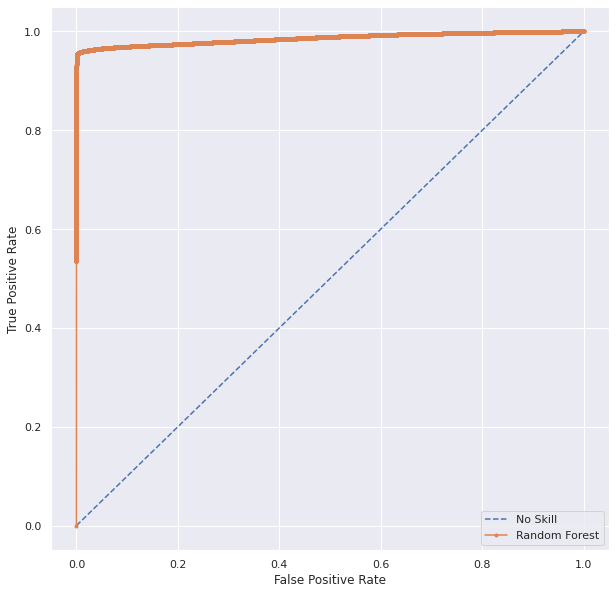

In [ ]:
rfc_probs = grid2.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
plt.figure(figsize=(10, 10))
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.970 auc=0.991


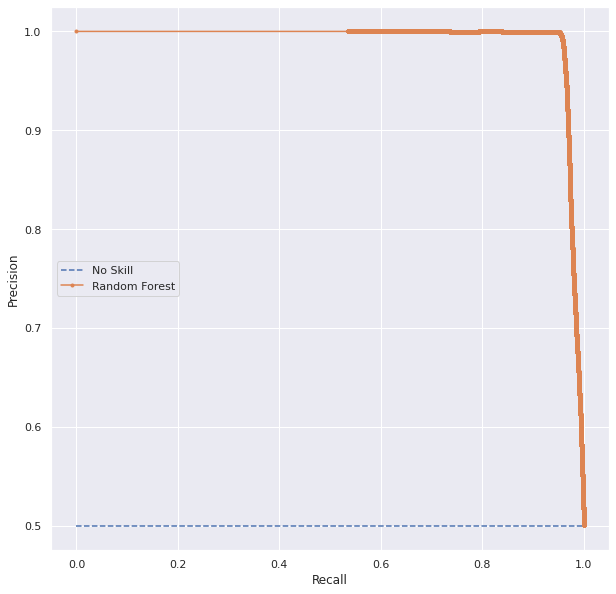

In [ ]:
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
rfc_f1, rfc_auc = f1_score(y_test, y_pred), auc(rfc_recall, rfc_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
# plot the precision-recall curves
no_skill = y_test.value_counts()[1] / len(y_test)
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# ***Grafik hasil prediksi dengan model Random Forest***


---

In [ ]:
import re
import matplotlib.pyplot as plt

par=df.columns
print(par)
i=0
dic={}
arr2=[]
Dic0={}
Dic1={}
with open('/content/log_datmin.txt') as e:
    for l in e:
        a=re.split("; |\\n |[ |]",l)
        #print(a,len(a))
        if len(a)>4 and len(a)!=1 and 'shape=box' not in line and 'labeldistance' not in l:
            Dic0[a[1][len('[label="'):]+'_'+a[3][:3]]=0
            Dic1[a[1][len('[label="'):]+'_'+a[3][:3]]=0
e.close()

with open('/content/log_datmin.txt') as f:
    for line in f:
        a=re.split("; |\\n |[ |]",line)
        #print(a,len(a))
        if len(a)>4 and len(a)!=1 and 'shape=box' not in line and 'labeldistance' not in line:
            #print(a)
            nol=float(a[-3][:-1].split('[')[-1])
            satu=float(a[-2][:-len(']"]')])
            #print(a[1][len('[label="'):])
            #print(len(a))
            #print([a[1][len('[label="'):],float(a[3][:3]),nol,satu])
            dic[int(a[0])]=[a[1][len('[label="'):],float(a[3][:3]),nol,satu].copy()
            
        elif len(a)==4:
            fr=int(a[0])
            t=int(a[2])
            if dic[t][0]!='gini':
                #print(fr,t)
                if len(arr2)==0:
                    arr2.append(dic[fr])
                    arr2.append(dic[t])
                else:
                    arr2.append(dic[t])
            elif dic[t][0]=='gini':
                if dic[t][1]==0.0:
                    #print(arr2)
                    print(np.argmax(dic[t][-2:]))
                    if np.argmax(dic[t][-2:])==0:
                        for i in range(len(arr2)):
                            Dic0[arr2[i][0]+'_'+str(arr2[i][1])]=Dic0[arr2[i][0]+'_'+str(arr2[i][1])]+1
                            #print(Dic0[arr2[i][0]+'_'+str(arr2[i][1])])
                    elif np.argmax(dic[t][-2:])==1:
                        for i in range(len(arr2)):
                            Dic1[arr2[i][0]+'_'+str(arr2[i][1])]=Dic1[arr2[i][0]+'_'+str(arr2[i][1])]+1
                else:
                    pass
                arr2=[]
print(Dic0,Dic1)

Index(['purchase_value', 'sex', 'age', 'time_diff', 'source_Ads',
       'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox',
       'browser_IE', 'browser_Opera', 'browser_Safari', 'signup_DOW_Fri',
       'signup_DOW_Mon', 'signup_DOW_Sat', 'signup_DOW_Sun', 'signup_DOW_Thu',
       'signup_DOW_Tue', 'signup_DOW_Wed', 'signup_p_Early Morning',
       'signup_p_Evening', 'signup_p_Late Night', 'signup_p_Morning',
       'signup_p_Night', 'signup_p_Noon', 'purchase_DOW_Fri',
       'purchase_DOW_Mon', 'purchase_DOW_Sat', 'purchase_DOW_Sun',
       'purchase_DOW_Thu', 'purchase_DOW_Tue', 'purchase_DOW_Wed',
       'purchase_p_Early Morning', 'purchase_p_Evening',
       'purchase_p_Late Night', 'purchase_p_Morning', 'purchase_p_Night',
       'purchase_p_Noon', 'is_fraud'],
      dtype='object')
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
1
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1

In [ ]:
Dic0={k: v for k, v in sorted(Dic0.items(), key=lambda item: item[1])}

In [ ]:
Dic1={k: v for k, v in sorted(Dic1.items(), key=lambda item: item[1])}

In [ ]:
Dic1

{'age_0.0': 35,
 'age_0.4': 1,
 'age_0.5': 2,
 'browser_Chrome_0.0': 56,
 'browser_FireFox_0.0': 15,
 'browser_IE_0.0': 19,
 'browser_Opera_0.0': 3,
 'browser_Safari_0.0': 18,
 'gini_0.0': 0,
 'gini_0.1': 0,
 'gini_0.2': 0,
 'gini_0.3': 0,
 'gini_0.4': 0,
 'gini_0.5': 0,
 'purchase_DOW_Fri_0.0': 16,
 'purchase_DOW_Mon_0.0': 23,
 'purchase_DOW_Sat_0.0': 14,
 'purchase_DOW_Sun_0.0': 19,
 'purchase_DOW_Thu_0.0': 22,
 'purchase_DOW_Tue_0.0': 21,
 'purchase_DOW_Wed_0.0': 13,
 'purchase_p_Early_Morning_0.0': 13,
 'purchase_p_Evening_0.0': 23,
 'purchase_p_Late_Night_0.0': 22,
 'purchase_p_Morning_0.0': 19,
 'purchase_p_Night_0.0': 13,
 'purchase_p_Noon_0.0': 28,
 'purchase_value_0.0': 27,
 'purchase_value_0.1': 1,
 'purchase_value_0.2': 1,
 'purchase_value_0.8': 0,
 'sex_0.0': 54,
 'signup_DOW_Fri_0.0': 10,
 'signup_DOW_Mon_0.0': 19,
 'signup_DOW_Sat_0.0': 16,
 'signup_DOW_Sun_0.0': 13,
 'signup_DOW_Thu_0.0': 8,
 'signup_DOW_Tue_0.0': 8,
 'signup_DOW_Wed_0.0': 18,
 'signup_p_Early_Morning_0.

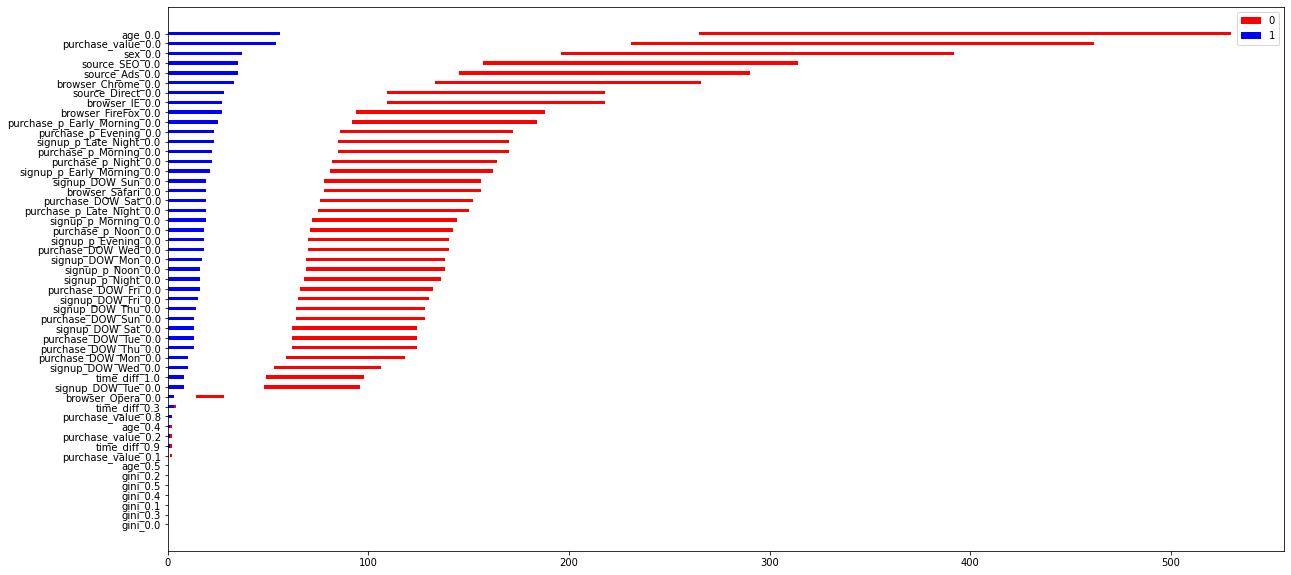

In [ ]:
#class 0
cat=[i for i in Dic0]
freq0=[Dic0[i] for i in Dic0]
freq1=[Dic1[i] for i in Dic1]
width = 0.35
fig = plt.figure(figsize=(20,10))
plt.barh(cat,freq0,width,color='r',label='0',left=freq0)
plt.barh(cat,freq1,width,color='b',label='1')
plt.legend()
plt.show()